# Review 2.4.2 before working on this


Using this Kaggle data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

C:\Users\maken\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
original = pd.read_csv('D:\\Data\\melbourne-housing-market\\Melbourne_housing_extra_data-18-08-2017.csv')

In [3]:
data = original

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
19737,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,...,2.0,2.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0
19738,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,1.0,2.0,269.0,NaN,NaN,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0
19739,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,3.0,2.0,1087.0,388.5,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0
19740,Yarraville,10/127 Somerville Rd,3,t,645000.0,SP,Jas,29/07/2017,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0


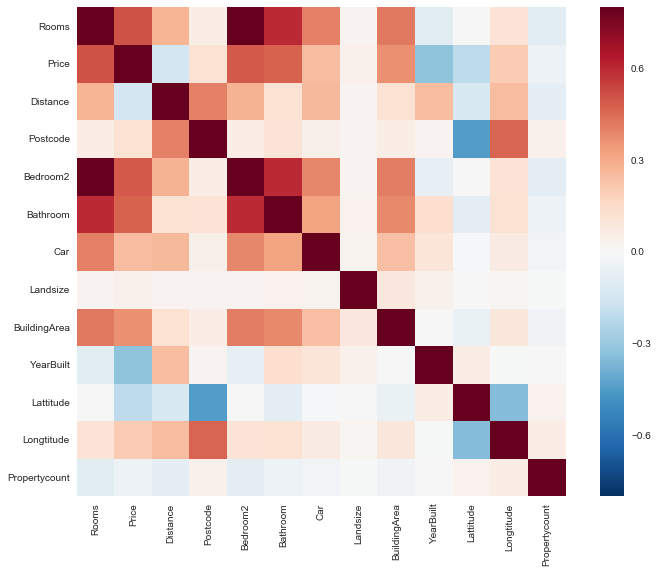

In [6]:
# Create a heatmap to compare the correlation of the columns.

corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Cleaning the data

In [7]:
# Since there are a lot of columns around the area (address, zip, etc.), 
# find out which ones have the least amount of missing data.
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4055
Bathroom          4055
Car               4055
Landsize          4082
BuildingArea     11359
YearBuilt        10092
CouncilArea       4085
Lattitude         3937
Longtitude        3937
Regionname           1
Propertycount        1
dtype: int64

In [8]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
#data.drop(['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'], axis=1)
drop_columns = data[['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname']]
#print(drop_columns)
data.drop(drop_columns, axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
new_data = data.iloc[~isin(data['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'])]

NameError: name 'isin' is not defined

# Need to work on dates, types, and suburbs... how can they be used in Regression?

In [10]:
#### Type is not included here, should probably convert type to columns with
#### binary values for townhouse, unit, etc.
#### What to do about Suburs when predicting price? Suburb dropped for now
new_data = data[['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
new_data

,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,NaN,1.0,1.0,126.0,NaN,NaN
1,2,1480000.0,1.0,1.0,202.0,NaN,NaN
2,2,1035000.0,1.0,0.0,156.0,79.00,1900.0
3,3,NaN,2.0,1.0,0.0,NaN,NaN
4,3,1465000.0,2.0,0.0,134.0,150.00,1900.0
5,3,850000.0,2.0,1.0,94.0,NaN,NaN
6,4,1600000.0,1.0,2.0,120.0,142.00,2014.0
7,4,NaN,2.0,2.0,400.0,220.00,2006.0
8,2,NaN,1.0,2.0,201.0,NaN,1900.0
9,2,NaN,2.0,1.0,202.0,NaN,1900.0


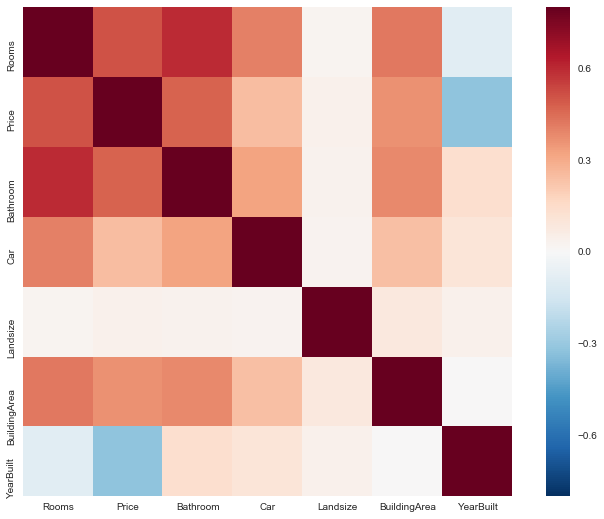

In [11]:
# Create a heatmap to compare the correlation of the columns.

corrmat = new_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [12]:
X = new_data.drop('Price', 1)
Y = new_data['Price']

In [13]:
# 500 iterations, using 5-deep trees, and loss function 'deviance.'
# Play around with number of iterations
# Look into learning rate
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X,Y)
y_pred = clf.fit(X,Y).predict(X)

# Print the R-Squared value and store it in the table
print('R-Squared of the model:') 
score = r2_score(Y, y_pred)
print(score)

# Print the accuracy of the model and store it in the table
print('Accuracy of the model:')
print(clf.score(X,Y))
# TODO: STORE IN TABLE


print('Confusion Matrix of the model:')
conf_mat = confusion_matrix(Y, y_pred)
print(conf_mat)

# Print the AUROC.
cv = cross_val_score(clf, X, Y, cv=10, scoring='roc_auc') 
print('AUROC Score:')
print(cv)
# Print the average of the AUROC and store it in the table
print('Average of the AUROC Score:')
print(sum(cv)/len(cv))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').